In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
# КРАСИВЫЕ ГРАФИКИ - КАК СИМВОЛ ПОБЕДЫ, ВЕКТОРНАЯ ПРОРИСОВКА - КАК ОРУДИЕ ВОЙНЫ
%config InlineBackend.figure_format = 'svg' 
import ensembles

In [ ]:
data = pd.read_csv('kc_house_data.csv')
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
showcase = data.iloc[[0, 1, 2]]
print(showcase.to_latex())

\begin{tabular}{lrlrrrrrrrrrrrrrrrrrrr}
\toprule
{} &          id &             date &     price &  bedrooms &  bathrooms &  sqft\_living &  sqft\_lot &  floors &  waterfront &  view &  condition &  grade &  sqft\_above &  sqft\_basement &  yr\_built &  yr\_renovated &  zipcode &      lat &     long &  sqft\_living15 &  sqft\_lot15 \\
\midrule
0 &  7129300520 &  20141013T000000 &  221900.0 &         3 &       1.00 &         1180 &      5650 &     1.0 &           0 &     0 &          3 &      7 &        1180 &              0 &      1955 &             0 &    98178 &  47.5112 & -122.257 &           1340 &        5650 \\
1 &  6414100192 &  20141209T000000 &  538000.0 &         3 &       2.25 &         2570 &      7242 &     2.0 &           0 &     0 &          3 &      7 &        2170 &            400 &      1951 &          1991 &    98125 &  47.7210 & -122.319 &           1690 &        7639 \\
2 &  5631500400 &  20150225T000000 &  180000.0 &         2 &       1.00 &          770 &     100

In [ ]:
showcase[showcase.columns[[0, 1, 2, 3, 4, 5, 6]]]
print(showcase[showcase.columns[[0, 1, 2, 3, 4, 5, 6]]].to_latex())

\begin{tabular}{lrlrrrrr}
\toprule
{} &          id &             date &     price &  bedrooms &  bathrooms &  sqft\_living &  sqft\_lot \\
\midrule
0 &  7129300520 &  20141013T000000 &  221900.0 &         3 &       1.00 &         1180 &      5650 \\
1 &  6414100192 &  20141209T000000 &  538000.0 &         3 &       2.25 &         2570 &      7242 \\
2 &  5631500400 &  20150225T000000 &  180000.0 &         2 &       1.00 &          770 &     10000 \\
\bottomrule
\end{tabular}



In [ ]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [ ]:
y = np.array(data.price)
data = data.drop(['price', 'date', 'id'], axis=1)
X = np.array(data)

In [ ]:
data.shape

(21613, 18)

In [ ]:
showcase = data.iloc[[0, 1, 2]]

In [ ]:
print(showcase.to_latex())

\begin{tabular}{lrrrrrrrrrrrrrrrrrr}
\toprule
{} &  bedrooms &  bathrooms &  sqft\_living &  sqft\_lot &  floors &  waterfront &  view &  condition &  grade &  sqft\_above &  sqft\_basement &  yr\_built &  yr\_renovated &  zipcode &      lat &     long &  sqft\_living15 &  sqft\_lot15 \\
\midrule
0 &         3 &       1.00 &         1180 &      5650 &     1.0 &           0 &     0 &          3 &      7 &        1180 &              0 &      1955 &             0 &    98178 &  47.5112 & -122.257 &           1340 &        5650 \\
1 &         3 &       2.25 &         2570 &      7242 &     2.0 &           0 &     0 &          3 &      7 &        2170 &            400 &      1951 &          1991 &    98125 &  47.7210 & -122.319 &           1690 &        7639 \\
2 &         2 &       1.00 &          770 &     10000 &     1.0 &           0 &     0 &          3 &      6 &         770 &              0 &      1933 &             0 &    98028 &  47.7379 & -122.233 &           2720 &        8062 \\


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
n_trees = 1000
max_depth = [1, 5, 10, 15, None]
fss = [1, 6, 12, 18]
lr = [0.1, 0.5, 1, 10]

In [ ]:
model_rf.fss

[1, 6, 12, 18]

In [ ]:
models = []
for d in max_depth:
  for f in fss:
    model_rf = ensembles.RandomForestMSE(n_estimators=n_trees, max_depth=d, feature_subsample_size=f, random_state=1)
    model_rf.fit(X_train, y_train, X_test, y_test)
    models.append(model_rf)

In [ ]:
models

In [ ]:
models[0].time

[0.003836393356323242,
 0.1961836814880371,
 0.39812159538269043,
 0.6009464263916016,
 0.7852001190185547,
 0.9882948398590088,
 1.1787075996398926,
 1.3779232501983643,
 1.5688848495483398,
 1.7499361038208008]

Text(0, 0.5, 'Время, секунды')

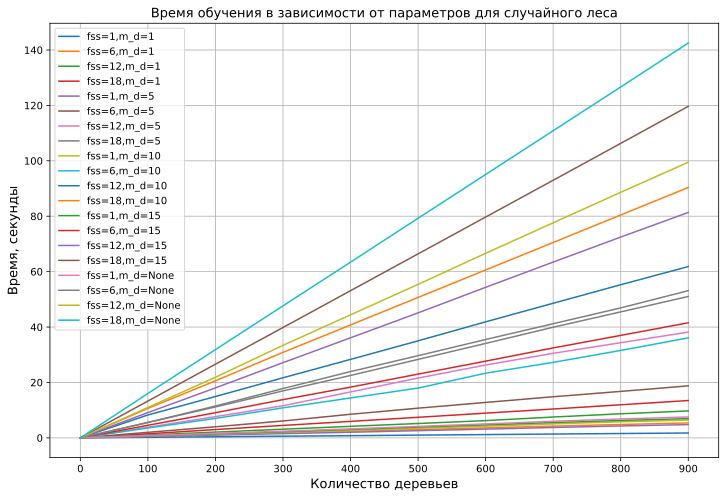

In [ ]:
fig = plt.figure(figsize=(12, 8))
for i in range(20):
  plt.plot(np.arange(0, 901, 100), np.array(models[i].time) - models[i].time[0], label=f'fss={models[i].fss},m_d={models[i].max_depth}')
plt.grid()
plt.legend()
plt.xticks(np.arange(0, 901, 100))
plt.title('Время обучения в зависимости от параметров для случайного леса', fontsize=13)
plt.xlabel('Количество деревьев', fontsize=13)
plt.ylabel('Время, секунды', fontsize=13)

Text(0, 0.5, 'Значение RMSE')

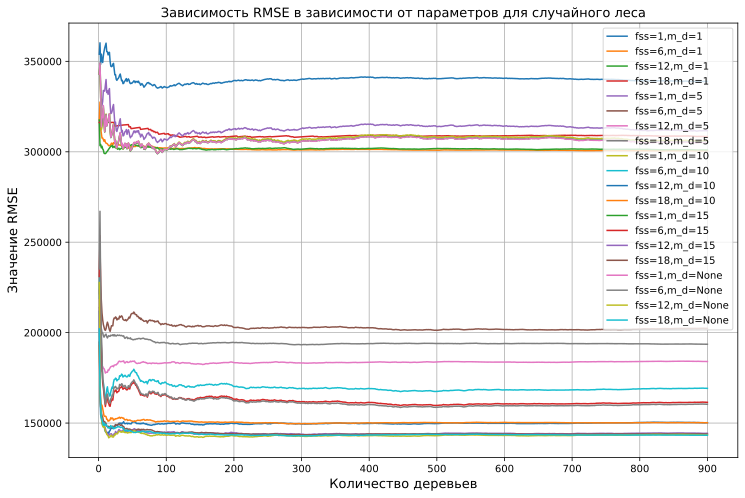

In [ ]:
fig = plt.figure(figsize=(12, 8))
for i in range(20):
  plt.plot(np.arange(1, 901), np.sqrt(np.array(models[i].val_iter_results))[:900], label=f'fss={models[i].fss},m_d={models[i].max_depth}')
plt.grid()
plt.legend()
plt.xticks(np.arange(0, 901, 100))
plt.title('Зависимость RMSE в зависимости от параметров для случайного леса', fontsize=13)
plt.xlabel('Количество деревьев', fontsize=13)
plt.ylabel('Значение RMSE', fontsize=13)

In [ ]:
from matplotlib.gridspec import tight_layout
fig.savefig('ВремяRF.pdf', tight_layout=True)

In [ ]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
n_trees = 1000
max_depth = [1, 5, 15, None]
fss = [6, 12, 18]
lrs = [0.1, 0.5, 1, 2]

In [ ]:
models_gb = []
for d in max_depth:
  for f in fss:
    for lr in lrs:
      model_gb = ensembles.GradientBoostingMSE(n_estimators=n_trees, max_depth=d, feature_subsample_size=f, learning_rate=lr, random_state=1)
      model_gb.fit(X_train, y_train, X_test, y_test)
      models_gb.append(model_gb)

In [ ]:
len(models_gb)

48

Text(0, 0.5, 'Время, секунды')

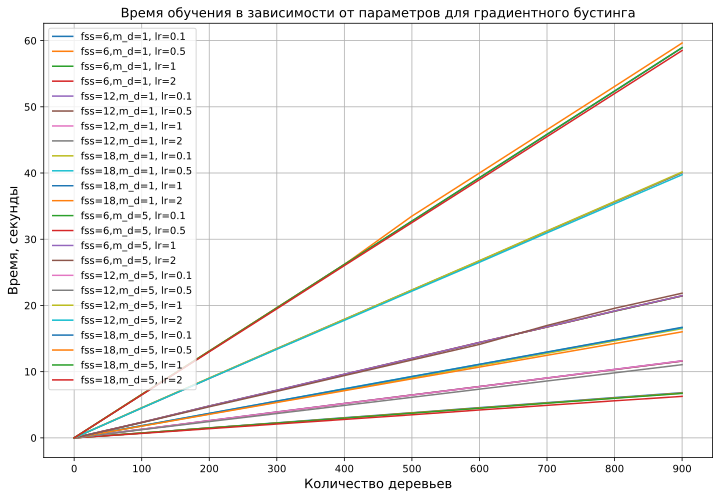

In [ ]:
fig = plt.figure(figsize=(12, 8))
for i in range(24):
  plt.plot(np.arange(0, 901, 100), np.array(models_gb[i].time) - models_gb[i].time[0], label=f'fss={models_gb[i].fss},m_d={models_gb[i].max_depth}, lr={models_gb[i].lr}')
plt.grid()
plt.legend()
plt.xticks(np.arange(0, 901, 100))
plt.title('Время обучения в зависимости от параметров для градиентного бустинга', fontsize=13)
plt.xlabel('Количество деревьев', fontsize=13)
plt.ylabel('Время, секунды', fontsize=13)

In [ ]:
from matplotlib.gridspec import tight_layout
fig.savefig('Время1GB.pdf', tight_layout=True)

Text(0, 0.5, 'Время, секунды')

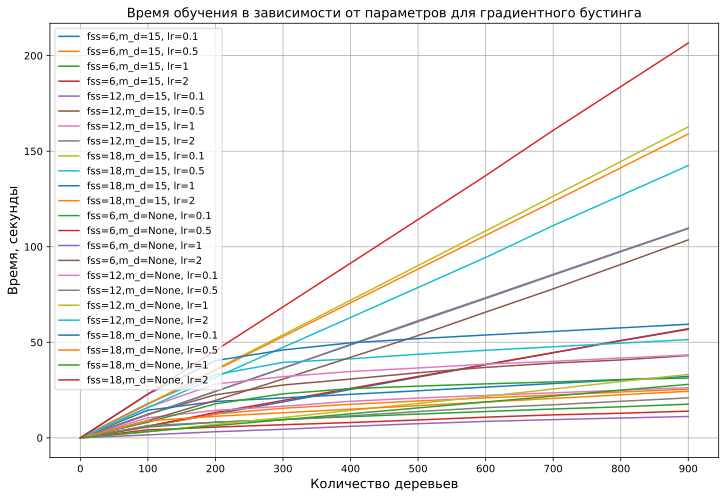

In [ ]:
fig = plt.figure(figsize=(12, 8))
for i in range(24, 48):
  plt.plot(np.arange(0, 901, 100), np.array(models_gb[i].time) - models_gb[i].time[0], label=f'fss={models_gb[i].fss},m_d={models_gb[i].max_depth}, lr={models_gb[i].lr}')
plt.grid()
plt.legend()
plt.xticks(np.arange(0, 901, 100))
plt.title('Время обучения в зависимости от параметров для градиентного бустинга', fontsize=13)
plt.xlabel('Количество деревьев', fontsize=13)
plt.ylabel('Время, секунды', fontsize=13)

In [ ]:
from matplotlib.gridspec import tight_layout
fig.savefig('Время2GB.pdf', tight_layout=True)

Text(0, 0.5, 'Время, секунды')

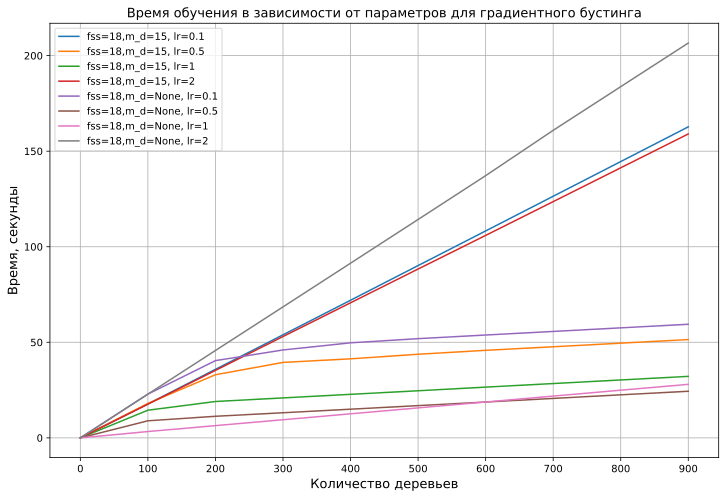

In [ ]:
fig = plt.figure(figsize=(12, 8))
for i in range(24, 48):
  if models_gb[i].fss == 18:
    plt.plot(np.arange(0, 901, 100), np.array(models_gb[i].time) - models_gb[i].time[0], label=f'fss={models_gb[i].fss},m_d={models_gb[i].max_depth}, lr={models_gb[i].lr}')
plt.grid()
plt.legend()
plt.xticks(np.arange(0, 901, 100))
plt.title('Время обучения в зависимости от параметров для градиентного бустинга', fontsize=13)
plt.xlabel('Количество деревьев', fontsize=13)
plt.ylabel('Время, секунды', fontsize=13)

Text(0, 0.5, 'Значение RMSE')

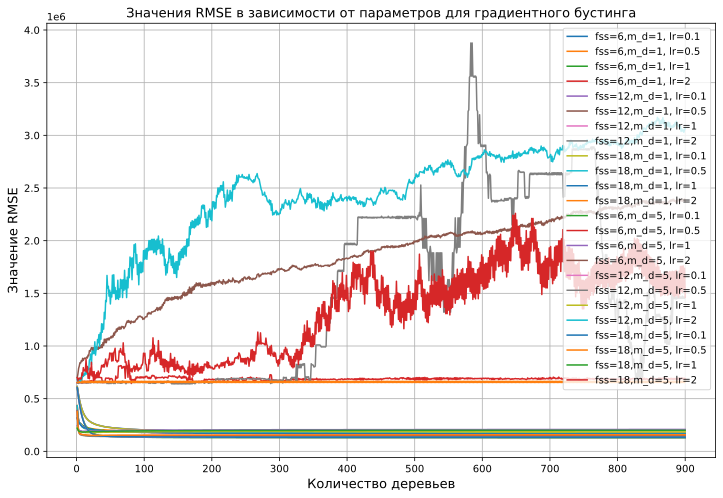

In [ ]:
fig = plt.figure(figsize=(12, 8))
for i in range(24):
  plt.plot(np.arange(1, 901), np.array(models_gb[i].val_iter_results)[:900], label=f'fss={models_gb[i].fss},m_d={models_gb[i].max_depth}, lr={models_gb[i].lr}')
plt.grid()
plt.legend()
plt.xticks(np.arange(0, 901, 100))
plt.title('Значения RMSE в зависимости от параметров для градиентного бустинга', fontsize=13)
plt.xlabel('Количество деревьев', fontsize=13)
#plt.ylim(0, 4000000)
plt.ylabel('Значение RMSE', fontsize=13)

In [ ]:
from matplotlib.gridspec import tight_layout
fig.savefig('RMSE11GB.pdf', tight_layout=True)

Text(0, 0.5, 'Значение RMSE')

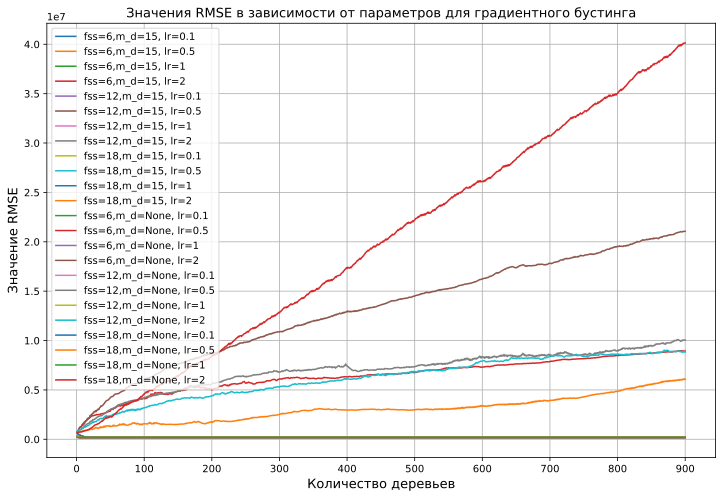

In [ ]:
fig = plt.figure(figsize=(12, 8))
for i in range(24, 48):
  plt.plot(np.arange(1, 901), np.array(models_gb[i].val_iter_results)[:900], label=f'fss={models_gb[i].fss},m_d={models_gb[i].max_depth}, lr={models_gb[i].lr}')
plt.grid()
plt.legend()
plt.xticks(np.arange(0, 901, 100))
plt.title('Значения RMSE в зависимости от параметров для градиентного бустинга', fontsize=13)
plt.xlabel('Количество деревьев', fontsize=13)
#plt.ylim(0, 4000000)
plt.ylabel('Значение RMSE', fontsize=13)

In [ ]:
from matplotlib.gridspec import tight_layout
fig.savefig('RMSE12GB.pdf', tight_layout=True)

Text(0, 0.5, 'Значение RMSE')

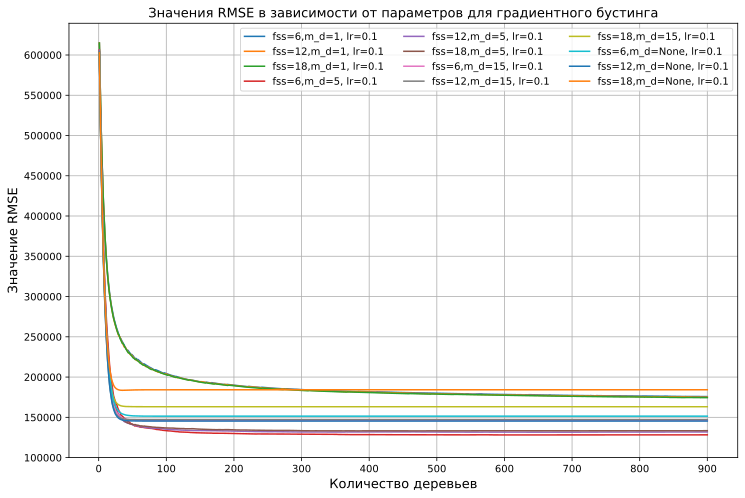

In [ ]:
fig = plt.figure(figsize=(12, 8))
for i in range(48):
  if models_gb[i].lr == 0.1:
    plt.plot(np.arange(1, 901), np.array(models_gb[i].val_iter_results)[:900], label=f'fss={models_gb[i].fss},m_d={models_gb[i].max_depth}, lr={models_gb[i].lr}')
plt.grid()
plt.legend(ncol=3)
plt.xticks(np.arange(0, 901, 100))
plt.title('Значения RMSE в зависимости от параметров для градиентного бустинга', fontsize=13)
plt.xlabel('Количество деревьев', fontsize=13)
plt.yticks(np.arange(100000, 600001, 50000))
plt.ylabel('Значение RMSE', fontsize=13)

In [ ]:
from matplotlib.gridspec import tight_layout
fig.savefig('RMSE22GB.pdf', tight_layout=True)

In [ ]:
len(model_gb.forest)

244

In [ ]:
model_gb.lr

10

In [ ]:
np.sqrt(model_rf.train_iter_results)

array([131626.25709408, 153070.87774811, 123499.04029334, 104871.75547925,
        94381.14189835,  84383.73963818,  79183.80057837,  76633.12927896,
        72339.20610878,  69944.71461019,  69108.87332948,  73051.26634286,
        71855.99437924,  69365.55835695,  68002.15362971,  67203.76815955,
        65989.26845865,  66557.41764612,  66082.29411923,  67295.5224008 ,
        66494.67027515,  67822.33457731,  67481.31018173,  66634.10213287,
        67068.27884682,  66163.90066844,  65208.78273593,  65058.8473062 ,
        64703.24381311,  65002.49046696,  65365.41502207,  65336.96735888,
        65064.23511514,  65214.49258006,  65076.46279752,  64616.31325041,
        64443.93025276,  64364.71247469,  64401.68177226,  63972.79529736,
        63480.59629692,  63081.63793864,  63144.3290268 ,  62983.44949144,
        62761.44419007,  62381.22031593,  62611.55465129,  62630.87078333,
        63024.67851589,  63008.60890376,  63696.80028269,  64288.02761592,
        63874.93370407,  

In [ ]:
model_gb = ensembles.GradientBoostingMSE(100, random_state=1)
model_gb.fit(X_train, y_train)
pred_gb = model_gb.predict(X_test)
print(mean_absolute_error(y_test, pred_gb))
print(mean_absolute_error(y_test, np.full(y_test.shape[0], y_train.mean())))
print(r2_score(y_test, pred_gb))
print(r2_score(y_test, np.full(y_test.shape[0], y_train.mean())))

73082.5514344369
237674.864169316
0.8766413564795769
-0.0004611999523151944


In [ ]:
np.sqrt(model_gb.val_iter_results)

array([606223.35502339, 551838.66882834, 505058.76279459, 463803.3570189 ,
       426070.16128078, 393461.32388743, 364869.9931485 , 340140.72585006,
       316965.22602247, 295982.63668749, 278778.64441641, 262349.68642601,
       250326.94592255, 237183.59774797, 227534.39317723, 216290.93391347,
       207321.34170446, 200988.91339237, 194159.10402119, 188315.46568344,
       182586.82900981, 176804.33466168, 174017.02013345, 171447.83065895,
       168367.90701825, 166776.00690618, 165114.43878716, 162160.49105454,
       159985.19337514, 157999.9016085 , 156732.108463  , 155289.42335772,
       152624.44235715, 152174.47361876, 151305.99368887, 150647.35345171,
       149506.88197858, 148705.97362038, 148371.69803241, 147728.5006609 ,
       146459.2879812 , 145389.69998593, 145256.10128766, 144489.6011479 ,
       144367.08586213, 143598.22309301, 142541.6459685 , 141947.97967073,
       141929.56168287, 141102.55439037, 140648.05690293, 140425.11490361,
       139289.80337419, 1

In [ ]:
import os
import pickle
import requests

os.makedirs('./artifacts', exist_ok=True)
with open('./artifacts/RF.pkl', 'wb') as f_out:
    pickle.dump(model_rf, f_out)
with open('./artifacts/GB.pkl', 'wb') as f_out:
    pickle.dump(model_gb, f_out)

In [ ]:
model_rf.__dict__

{'r_state': 1,
 'n': 100,
 'max_depth': None,
 'fss': None,
 'trees_params': {},
 'train_iter_results': [17325471556.59658,
  23430693614.577847,
  15252012953.375963,
  10998085097.300594,
  8907799946.036829,
  7120615515.323546,
  6270074274.0355425,
  5872636503.085428,
  5232960740.449056,
  4892263101.900565,
  4776036372.870654,
  5336487514.294985,
  5163283928.228778,
  4811580686.170857,
  4624292898.278915,
  4516346454.8431015,
  4354583551.708063,
  4429889843.720208,
  4366869596.060009,
  4528687335.196298,
  4421541175.000857,
  4599869067.516087,
  4553727223.842452,
  4440103567.053118,
  4498154027.4748335,
  4377661751.662876,
  4252185345.9014745,
  4232653612.8115034,
  4186509759.9390182,
  4225323766.9077682,
  4272637481.0076995,
  4268919303.655411,
  4233354691.1184998,
  4252930042.47513,
  4234946010.2369456,
  4175267938.075739,
  4153020146.4225144,
  4142816211.9489775,
  4147576615.0951867,
  4092518538.1573386,
  4029786106.2124376,
  3979293045.022191

In [ ]:
import json

In [ ]:
d = json.loads('{}')

In [ ]:
type(d)

dict

In [ ]:
isinstance(diction, dict)

True

In [ ]:
json_acceptable_string = str('{}').replace("'", "\"")
diction = json.loads(json_acceptable_string)

In [ ]:
r = model_rf.__dict__['train_iter_results']

In [ ]:
ar = json.dumps(r)

In [ ]:
ar

'[17325471556.59658, 23430693614.577847, 15252012953.375963, 10998085097.300594, 8907799946.036829, 7120615515.323546, 6270074274.0355425, 5872636503.085428, 5232960740.449056, 4892263101.900565, 4776036372.870654, 5336487514.294985, 5163283928.228778, 4811580686.170857, 4624292898.278915, 4516346454.8431015, 4354583551.708063, 4429889843.720208, 4366869596.060009, 4528687335.196298, 4421541175.000857, 4599869067.516087, 4553727223.842452, 4440103567.053118, 4498154027.4748335, 4377661751.662876, 4252185345.9014745, 4232653612.8115034, 4186509759.9390182, 4225323766.9077682, 4272637481.0076995, 4268919303.655411, 4233354691.1184998, 4252930042.47513, 4234946010.2369456, 4175267938.075739, 4153020146.4225144, 4142816211.9489775, 4147576615.0951867, 4092518538.1573386, 4029786106.2124376, 3979293045.0221915, 3987206288.2442365, 3966914909.841173, 3938998876.822709, 3891416648.104175, 3920206775.8517146, 3922625975.0781703, 3972110102.031321, 3970084795.9875035, 4057282366.2530704, 413295